# Experiment 01: Influence of number of centers

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

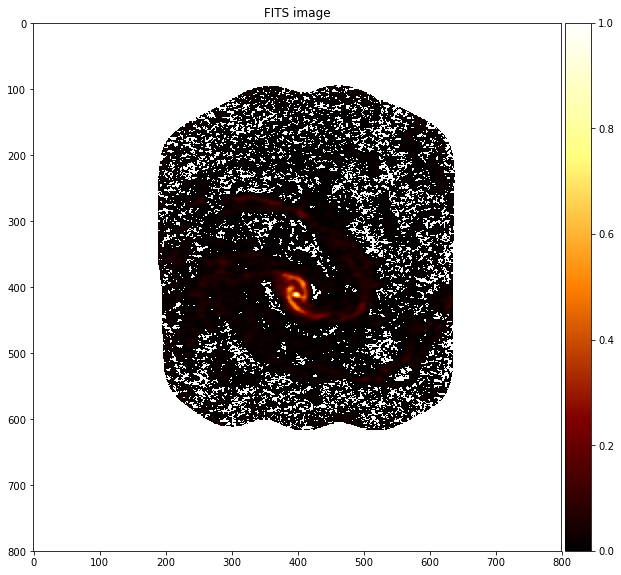

In [3]:
"""
Loading data
"""

#fits_path = '../data/images/Orion.cont.image.fits'
fits_path = '../data/images/M100_combine_CO_cube.image.mom0.pbcor.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [5]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/home/mavillan/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3902: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  check = self.filled(0).__eq__(other)


<function graph.thresholded_image_plot>

In [6]:
# common parameters
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

elm_list = list()

for Nc in range(25, 501, 25):
    # number of points of each type
    Nb = int(Nc*0.2)
    Ne = 4*Nc-Nb
    
    # points generation
    center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
    collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    #c0, sig0 = estimate_initial_guess(center_points, f, R=0.009, method='mean_dist')
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')
    #c0, sig0 = _estimate_initial_guess(dfunc, data, center_points, base_level)


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.))

../lib/points_generation.py:29: RuntimeWarning: invalid value encountered in less_equal
  mask = data <= base_level
../lib/points_generation.py:128: RuntimeWarning: invalid value encountered in greater
  pixel_map = data > base_level
../lib/variational.py:79: RuntimeWarning: invalid value encountered in greater
  self.mask = data > base_level


##########################################################################################
Processing 25 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 10100.
nfev: 10114

Residual stats:
Residual RMS: 0.09393110574544777
Residual Variance: 0.008499632517368358
Flux Lost: 0.2831358583733646
Flux Addition: 0.1067503219280938
psi1(u-f): 51.844108638942785
Exceeded Pixels: 1895
Sharpness: 43.118722585902816
psi2(grad u): 22.691638598716374
Total elapsed time: 1.6701185703277588 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2513848369287152
Mean min distance between collocation and center points:

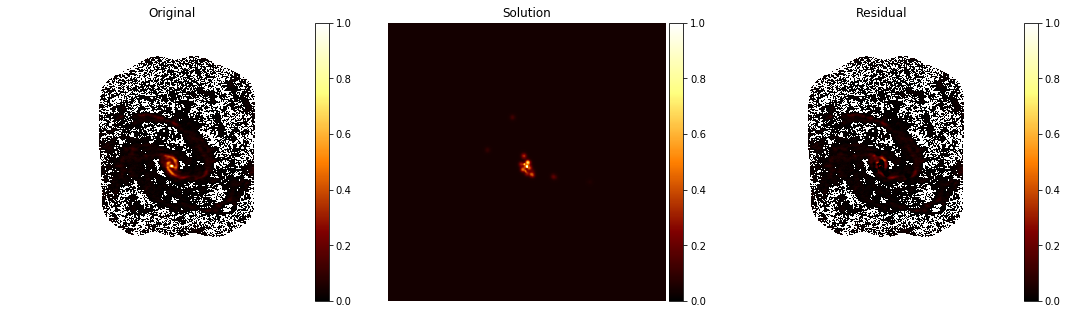

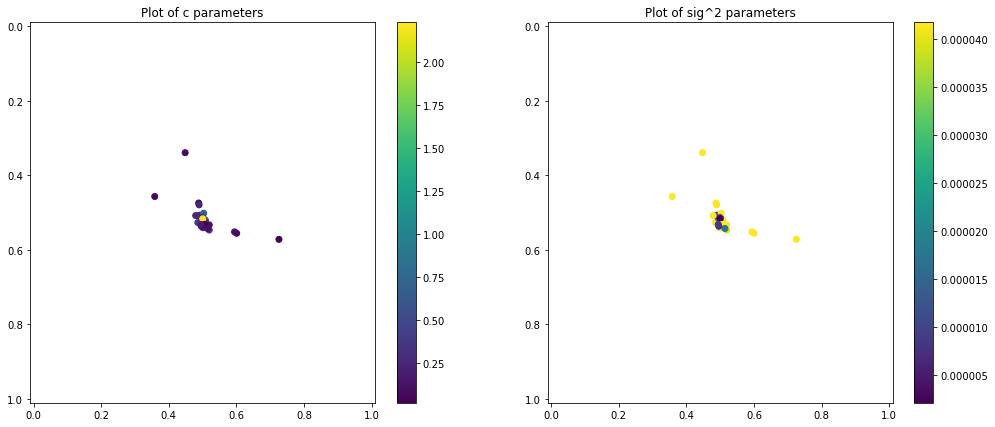

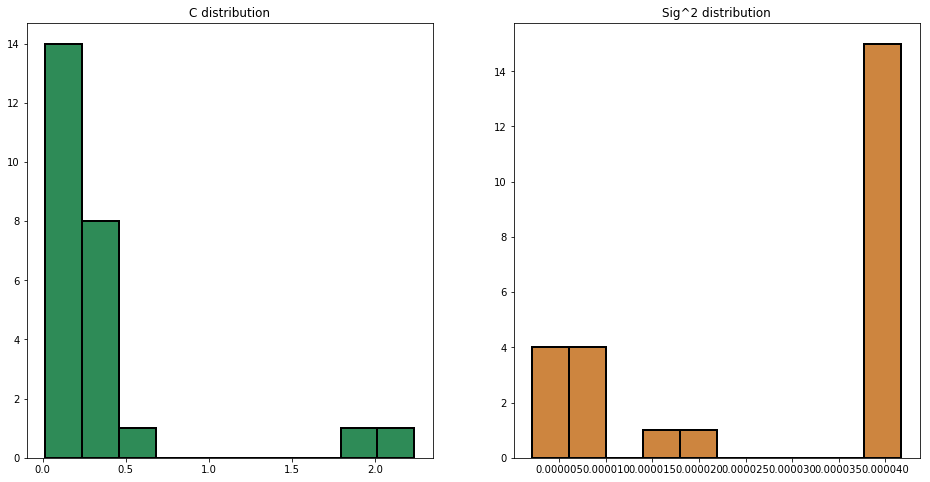

##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20112

Residual stats:
Residual RMS: 2.081093605800081
Residual Variance: 4.3221716681073685
Flux Lost: 0.20696689031381868
Flux Addition: 1.1259344993262599
psi1(u-f): 112.76974518942382
Exceeded Pixels: 2708
Sharpness: 9762.467659369666
psi2(grad u): 648.0954493310023
Total elapsed time: 4.549794673919678 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2870539050219905
Mean min distance between collocation and center points: 0.039

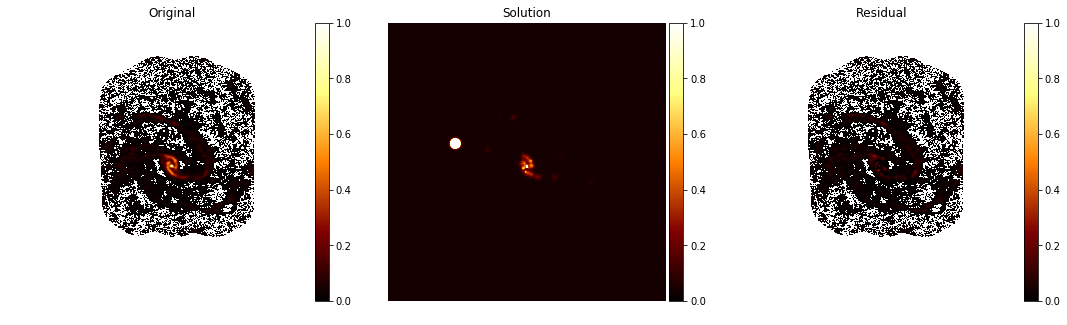

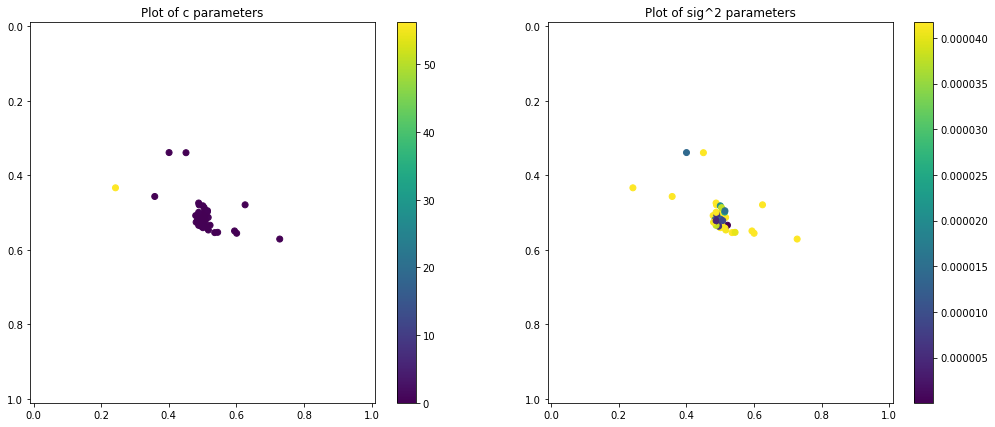

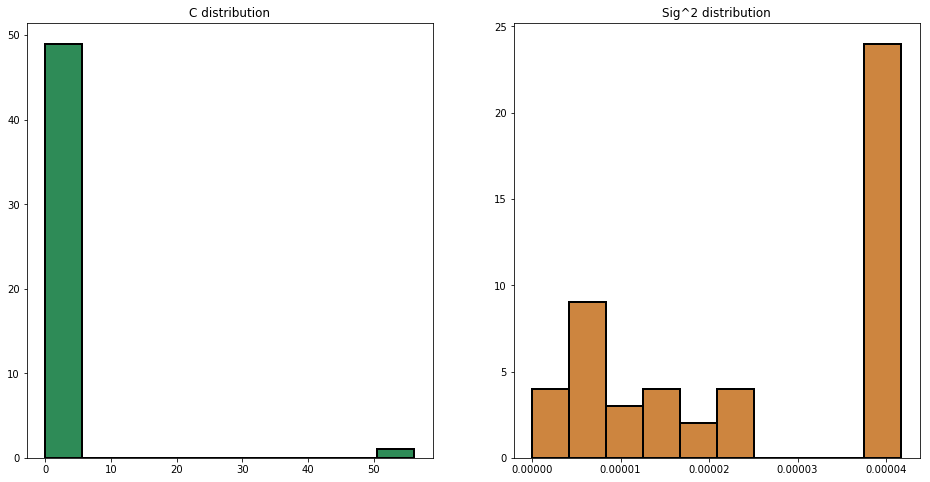

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 30100.
nfev: 30112

Residual stats:
Residual RMS: 2.8542276667890514
Residual Variance: 8.128046692944245
Flux Lost: 0.17348066091515743
Flux Addition: 1.509991010371518
psi1(u-f): 121.74524518894461
Exceeded Pixels: 2991
Sharpness: 18159.93035502296
psi2(grad u): 729.7095163427285
Total elapsed time: 9.56007695198059 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.28705390502199213
Mean min distance between collocation and center points: 0.0337

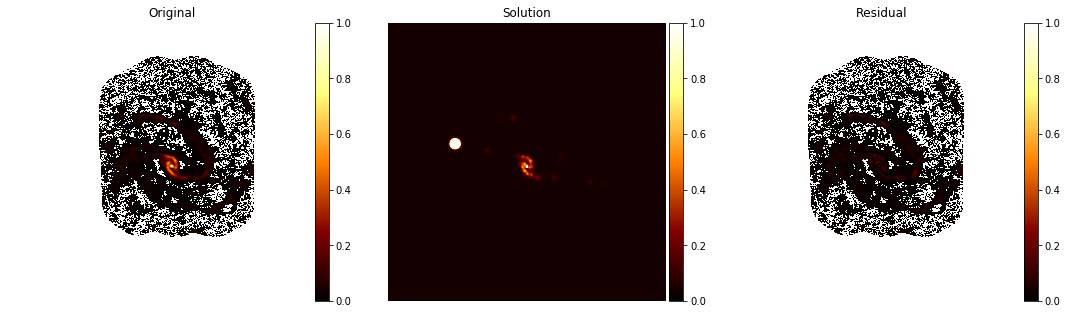

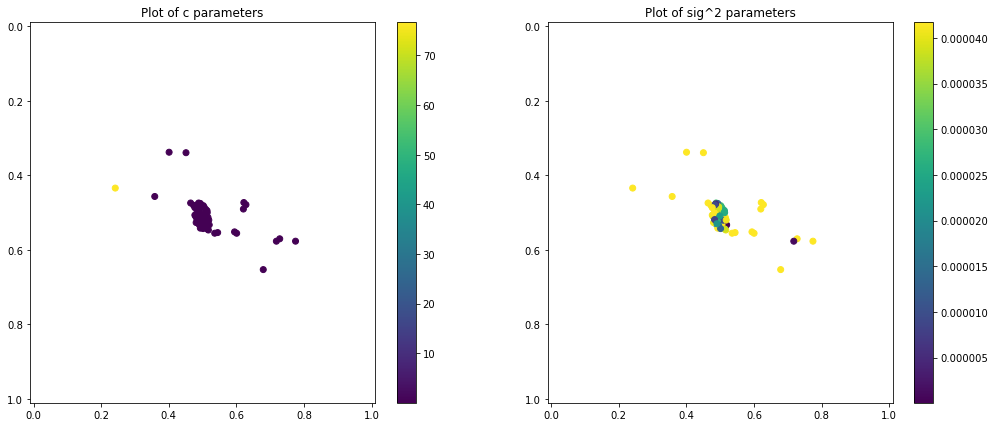

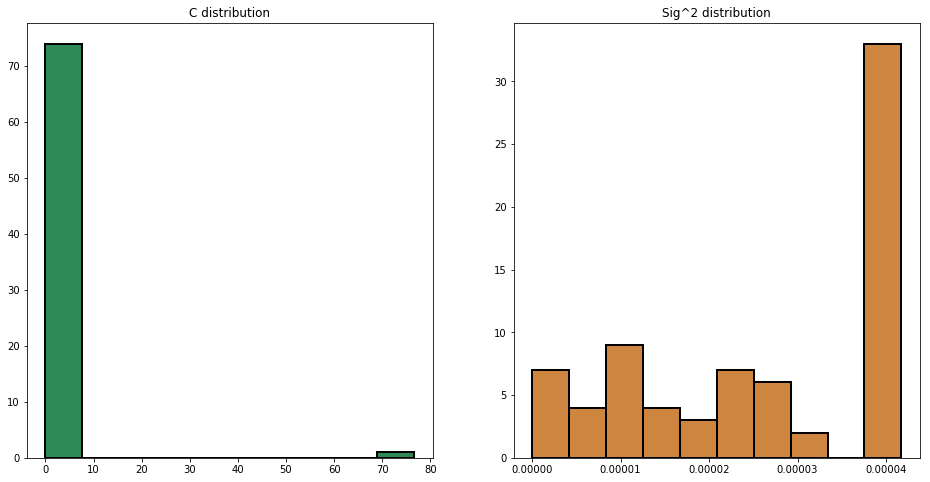

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40108

Residual stats:
Residual RMS: 0.04262460997406488
Residual Variance: 0.0017378274483264185
Flux Lost: 0.14933744404404906
Flux Addition: 0.062145722771919744
psi1(u-f): 15.799806541497066
Exceeded Pixels: 3388
Sharpness: 12.355921750623413
psi2(grad u): 3.744936683733935
Total elapsed time: 17.570080757141113 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2675204475643083
Mean min distance between collocation and center poi

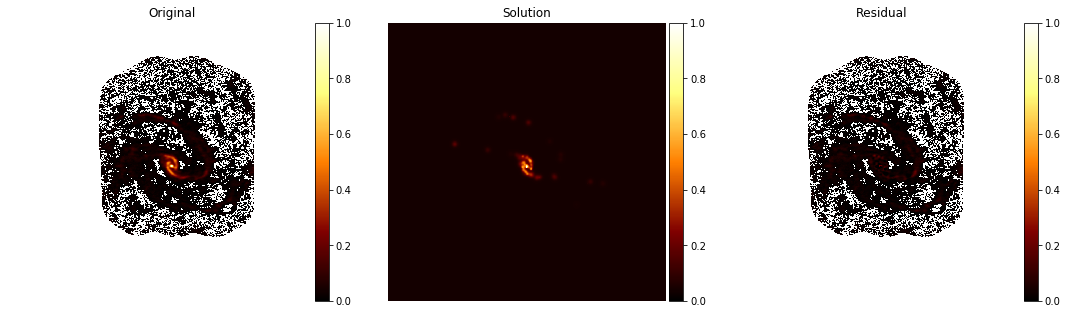

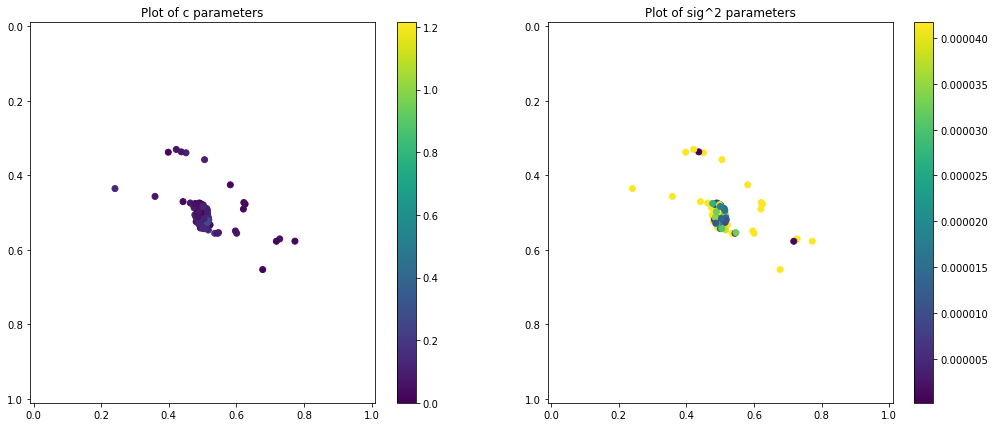

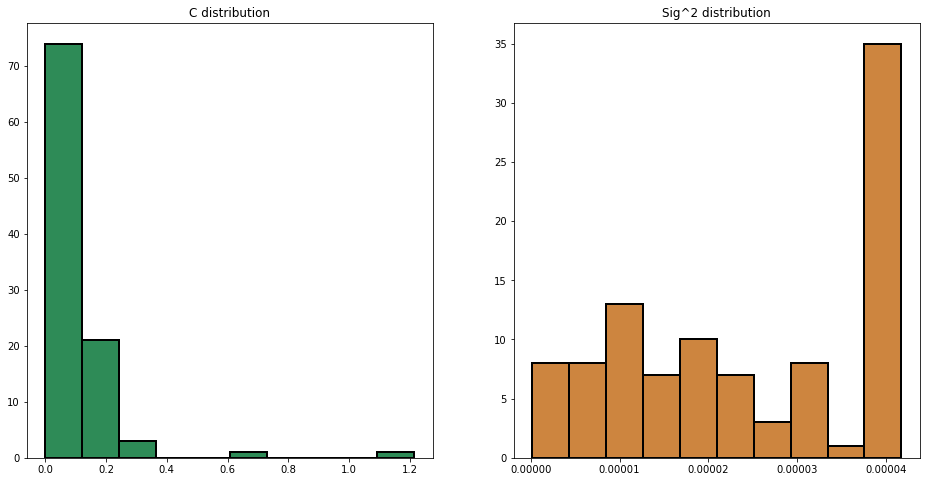

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50111

Residual stats:
Residual RMS: 0.053352943220084756
Residual Variance: 0.0028090650460728408
Flux Lost: 0.13289758967082482
Flux Addition: 0.07285906331577315
psi1(u-f): 29.157122804527578
Exceeded Pixels: 3695
Sharpness: 21.231583023398844
psi2(grad u): 9.135573986112053
Total elapsed time: 29.1947283744812 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2640439528199069
Mean min distance between collocation and center point

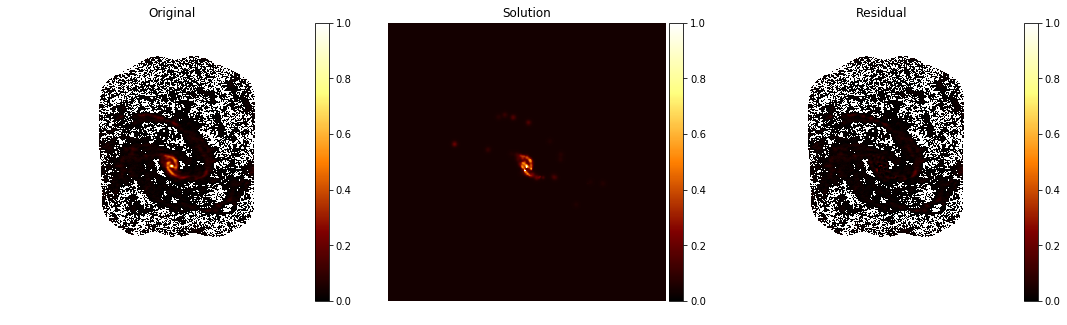

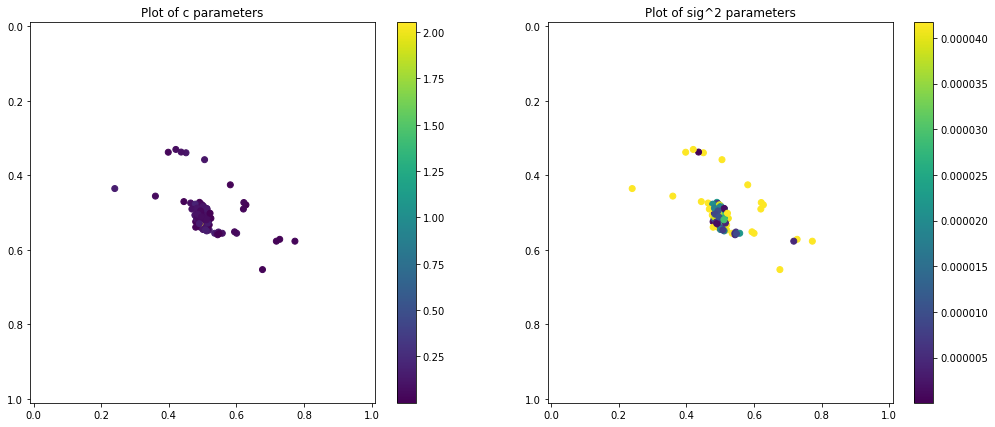

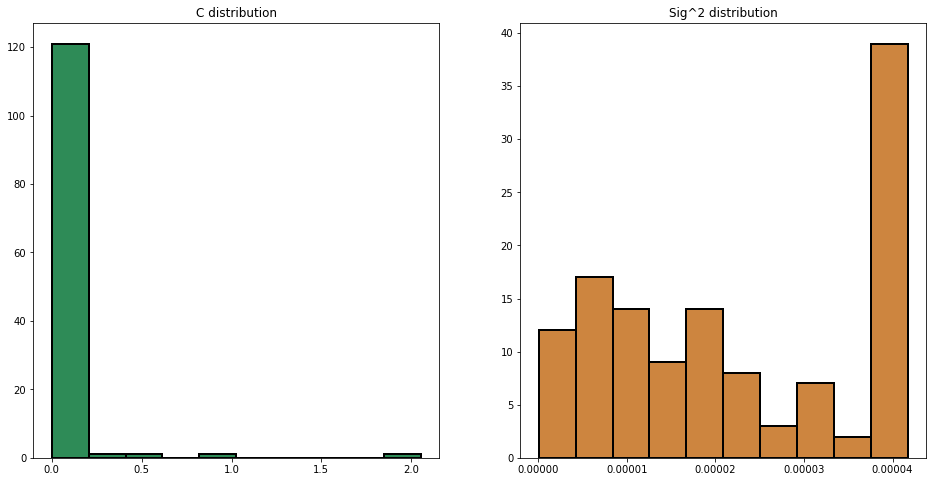

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60110

Residual stats:
Residual RMS: 0.0405532048360433
Residual Variance: 0.0016259230770832736
Flux Lost: 0.1103803028183371
Flux Addition: 0.06803601932899629
psi1(u-f): 22.96417833281623
Exceeded Pixels: 4194
Sharpness: 16.344037134320157
psi2(grad u): 2.252699284547462
Total elapsed time: 45.9466450214386 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26404517670014777
Mean min distance between collocation and center points: 

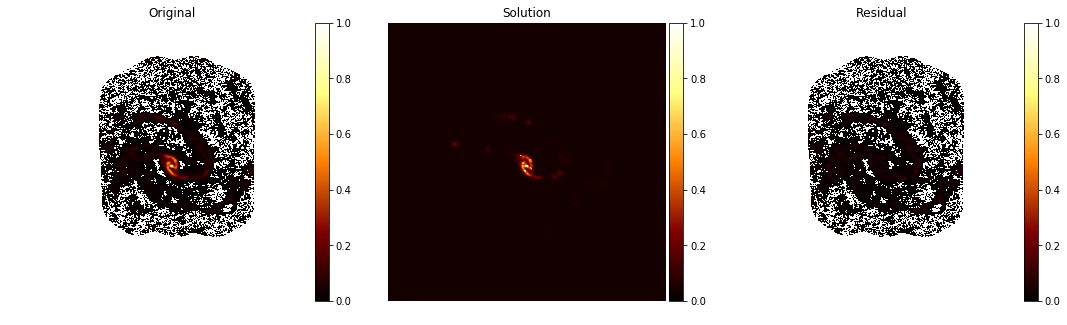

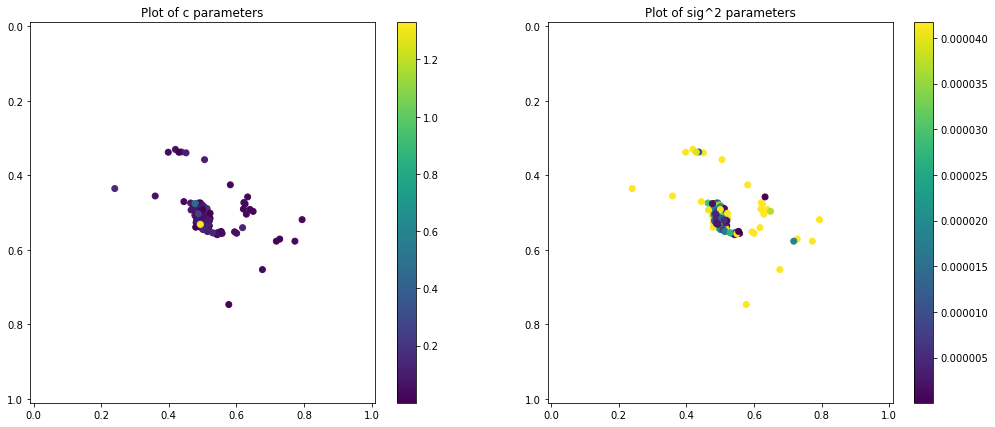

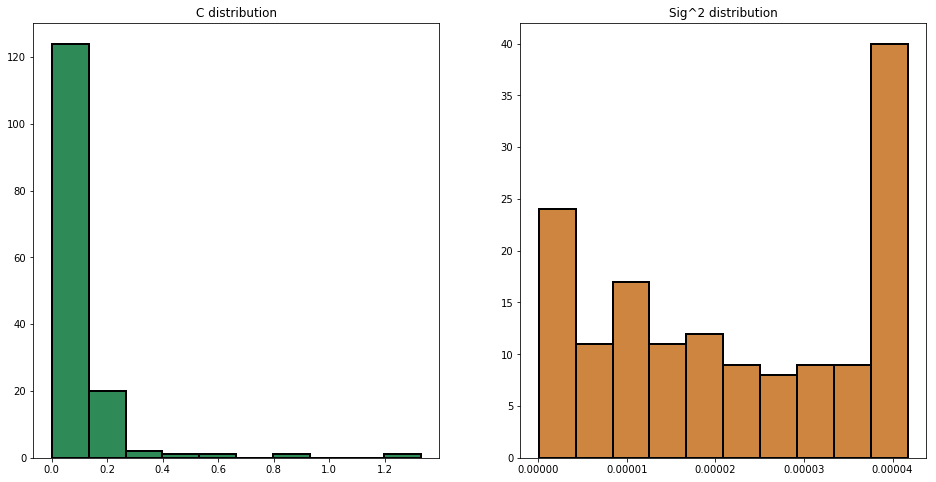

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 70100.
nfev: 70113

Residual stats:
Residual RMS: 0.03979305188145517
Residual Variance: 0.0015677218835175308
Flux Lost: 0.10142142120783305
Flux Addition: 0.062478569574209795
psi1(u-f): 22.755953507342358
Exceeded Pixels: 4287
Sharpness: 14.529718279079159
psi2(grad u): 1.5159753272722674
Total elapsed time: 68.99750995635986 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.262290817383484
Mean min distance between collocation and center poin

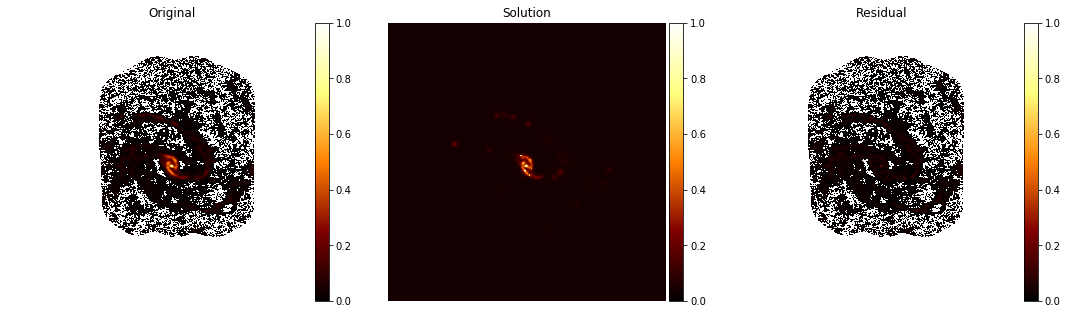

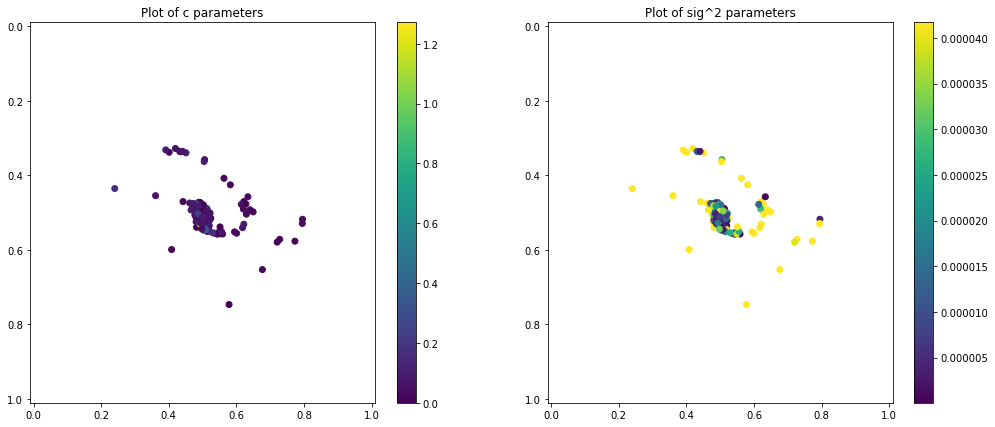

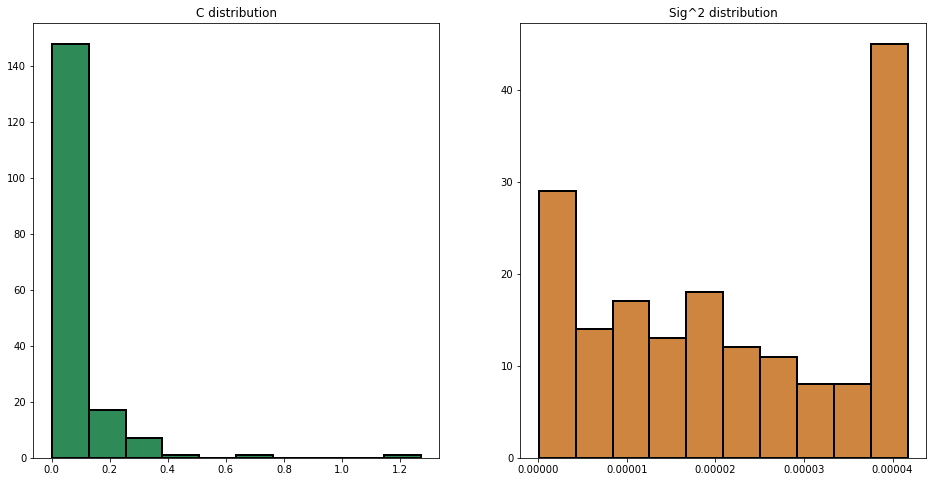

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80110

Residual stats:
Residual RMS: 0.029911888018922504
Residual Variance: 0.0008863065349215
Flux Lost: 0.08642148339315284
Flux Addition: 0.05797072324877845
psi1(u-f): 13.908171418442317
Exceeded Pixels: 4788
Sharpness: 11.544073671654862
psi2(grad u): 0.27515622644158266
Total elapsed time: 98.72642588615417 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2628885022381268
Mean min distance between collocation and center point

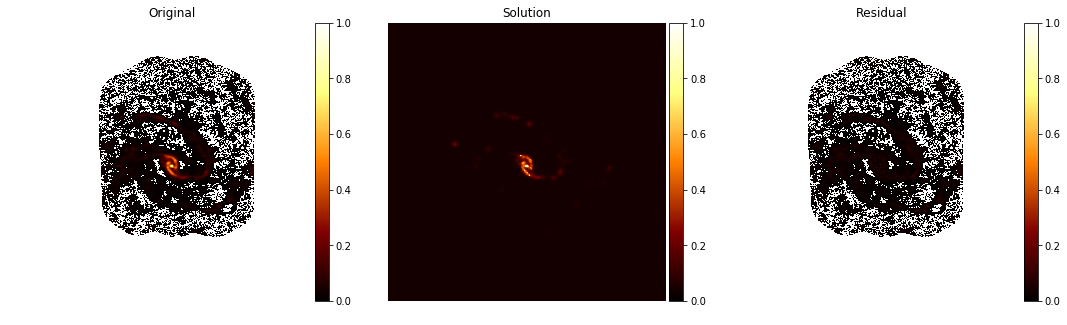

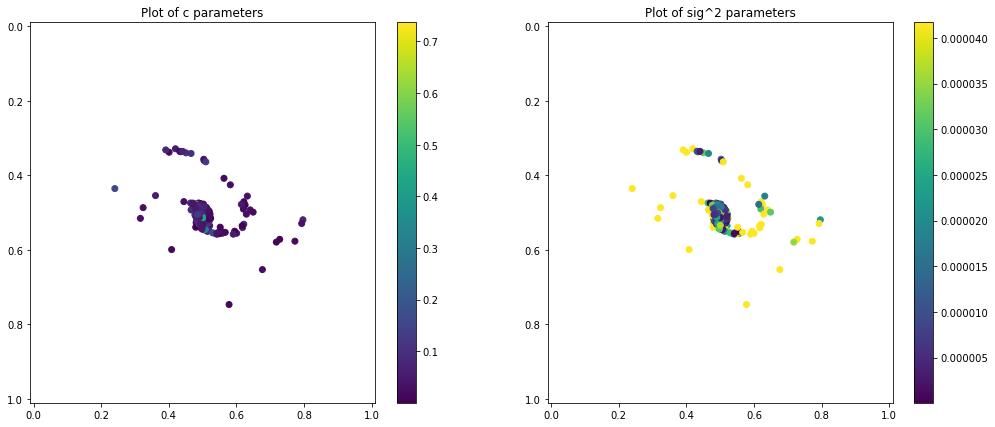

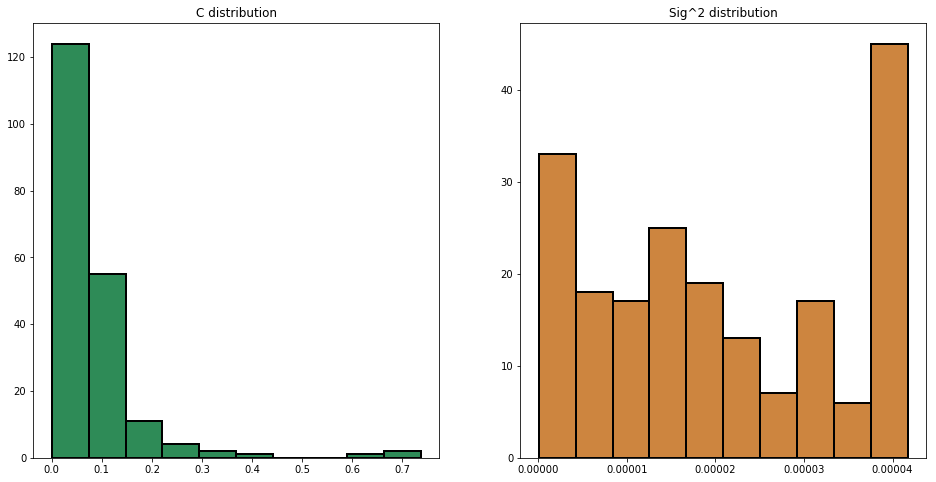

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90113

Residual stats:
Residual RMS: 0.028284495154994625
Residual Variance: 0.000791780718261248
Flux Lost: 0.0807079000855831
Flux Addition: 0.05256746762161703
psi1(u-f): 12.104452224795438
Exceeded Pixels: 4926
Sharpness: 10.630535962827507
psi2(grad u): 0.319643160314753
Total elapsed time: 144.09432935714722 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26311716617101144
Mean min distance between collocation and center poin

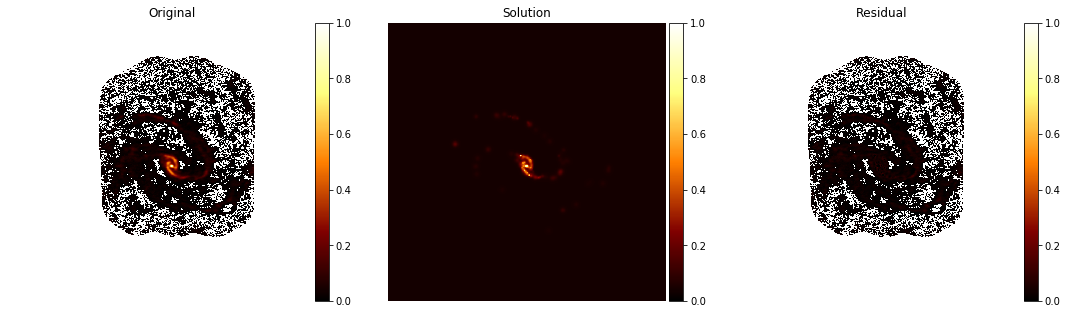

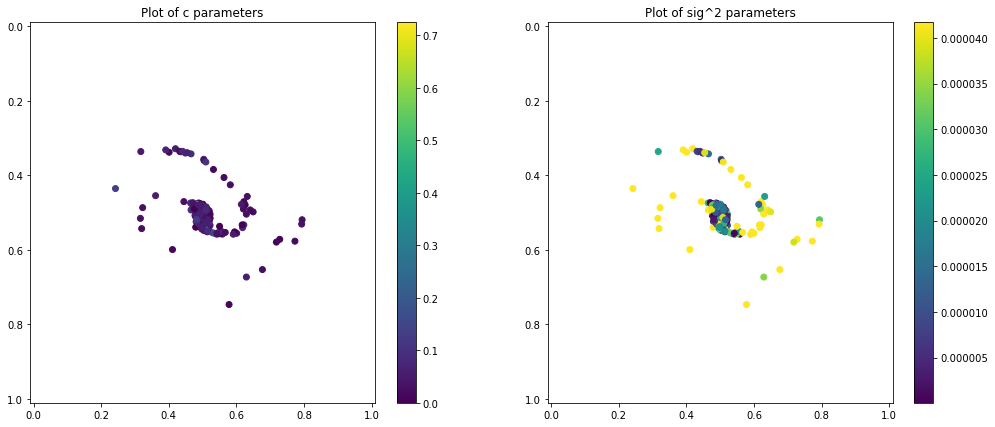

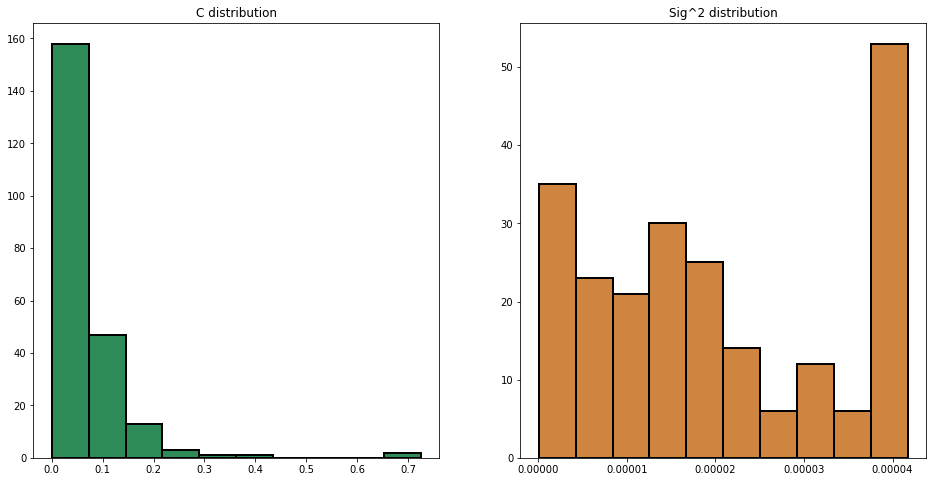

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.036611691526947765
Residual Variance: 0.0013350708972399252
Flux Lost: 0.0773597857982811
Flux Addition: 0.054684345881692756
psi1(u-f): 18.161330890803445
Exceeded Pixels: 5043
Sharpness: 13.112026804434356
psi2(grad u): 1.3828966218855658
Total elapsed time: 187.61947298049927 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2632414315855314
Mean min distance between collocation and center 

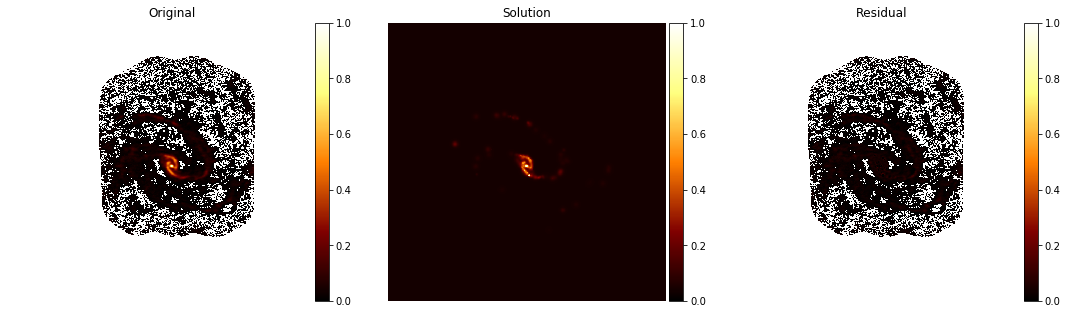

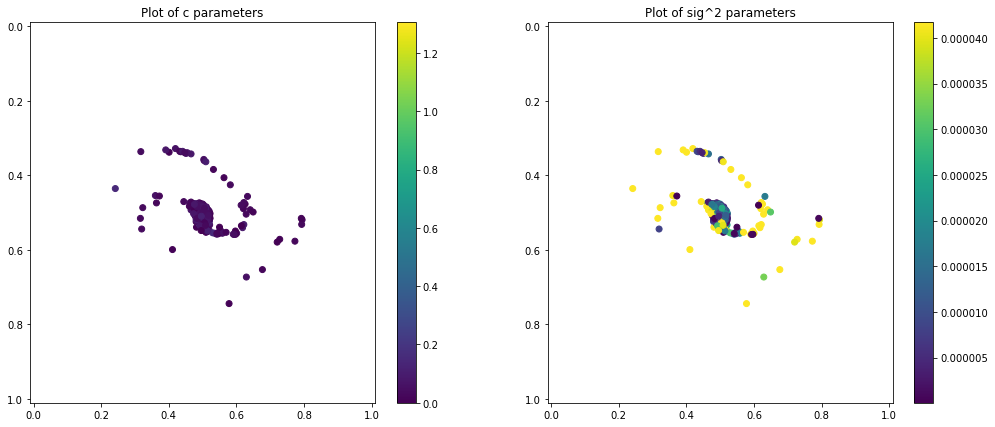

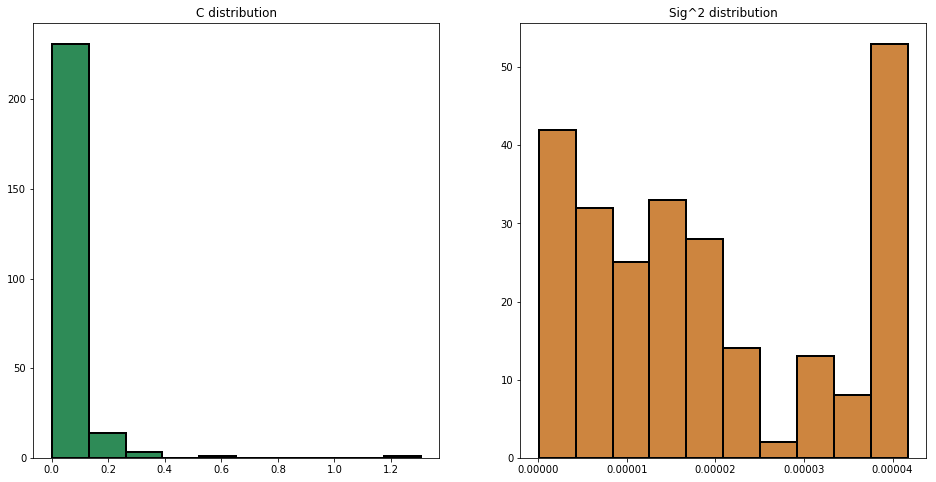

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110116

Residual stats:
Residual RMS: 0.03289419451957494
Residual Variance: 0.001078345642700687
Flux Lost: 0.0735812688477507
Flux Addition: 0.05476019603466963
psi1(u-f): 15.655644977272758
Exceeded Pixels: 5380
Sharpness: 10.98191335938656
psi2(grad u): 0.6457798212333153
Total elapsed time: 301.5086245536804 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26648209450852445
Mean min distance between collocation and center poin

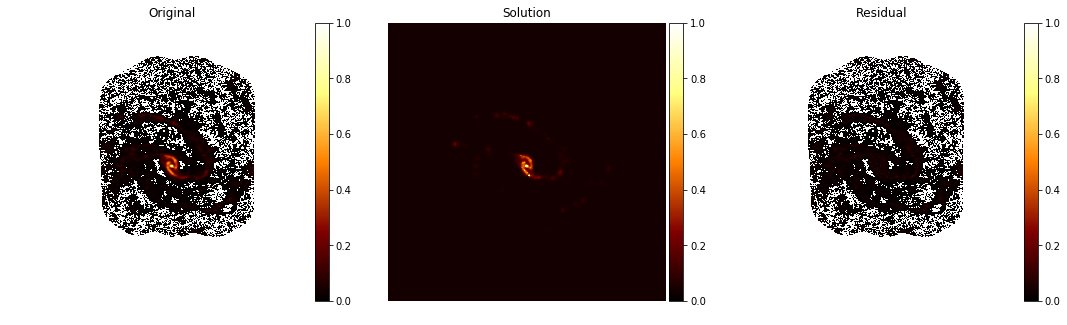

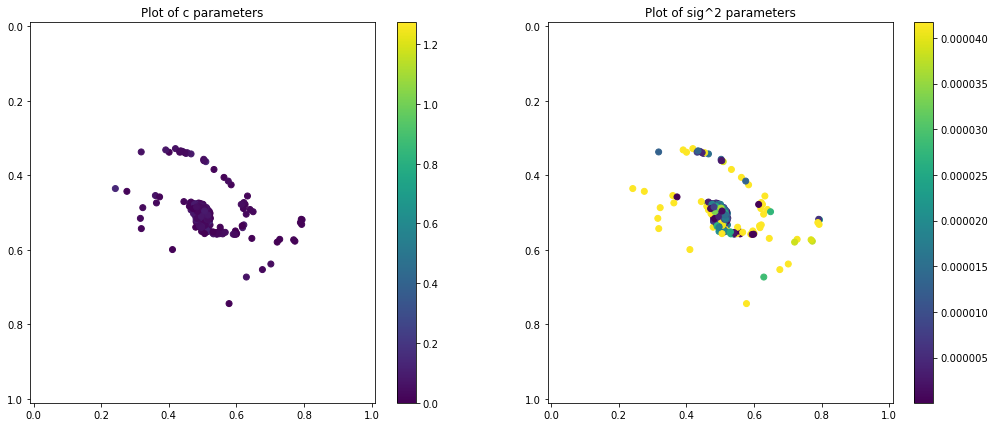

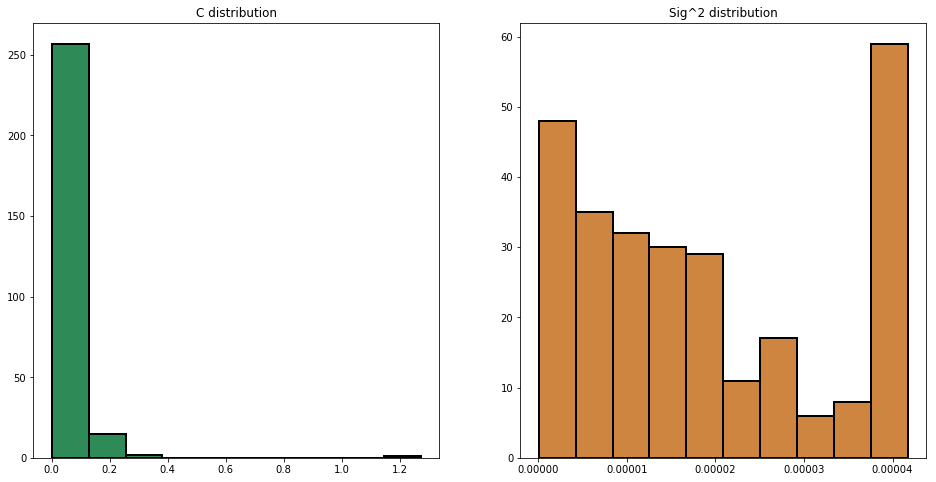

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120110

Residual stats:
Residual RMS: 0.032949565340329785
Residual Variance: 0.0010824255088002868
Flux Lost: 0.06816191418021786
Flux Addition: 0.05048482757486366
psi1(u-f): 15.6719520455817
Exceeded Pixels: 5359
Sharpness: 11.28951225845466
psi2(grad u): 0.8214424875619052
Total elapsed time: 368.4191482067108 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2661743572598256
Mean min distance between collocation and center poin

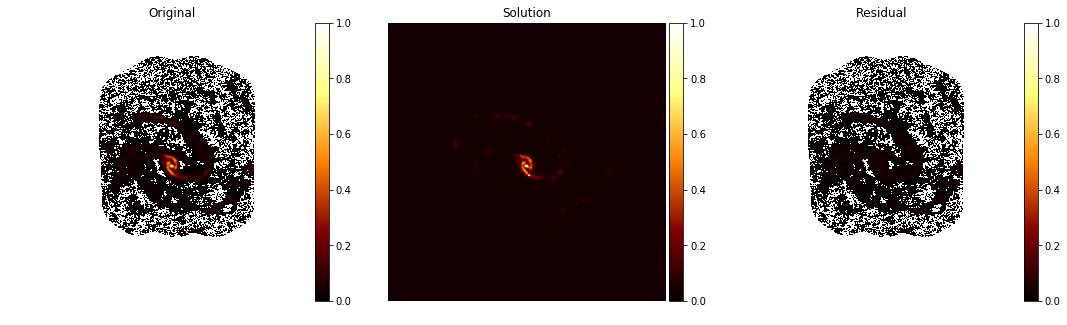

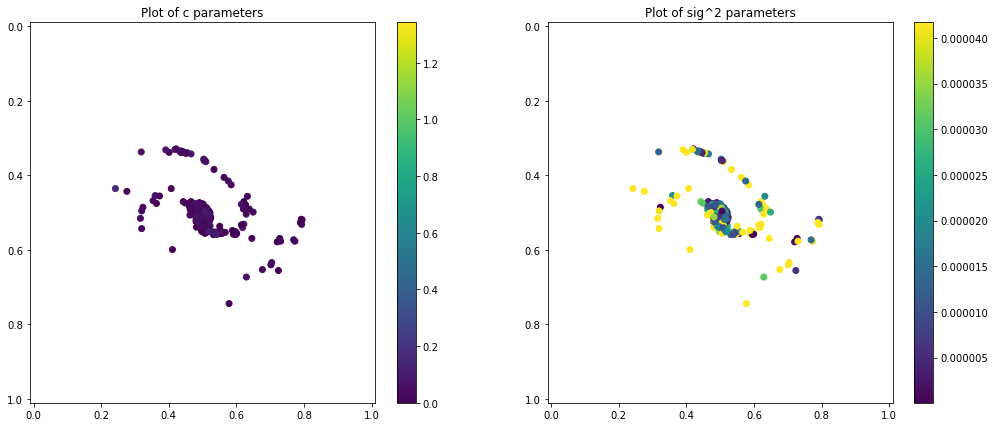

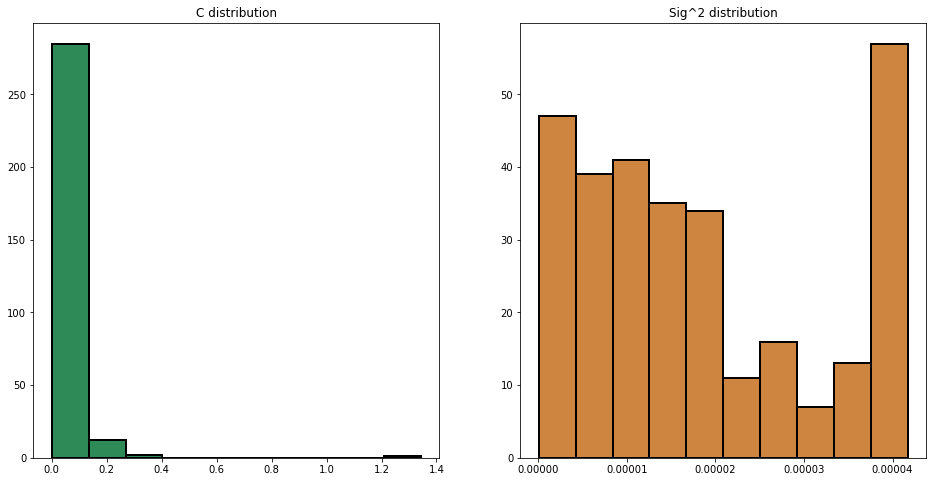

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130112

Residual stats:
Residual RMS: 0.017489255629099178
Residual Variance: 0.00029981010425706583
Flux Lost: 0.06429053896239761
Flux Addition: 0.040138290924729085
psi1(u-f): 1.9467169728483742
Exceeded Pixels: 5556
Sharpness: 7.1530591335740095
psi2(grad u): 0.030012113737108152
Total elapsed time: 471.44798970222473 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26610488065033194
Mean min distance between collocation and ce

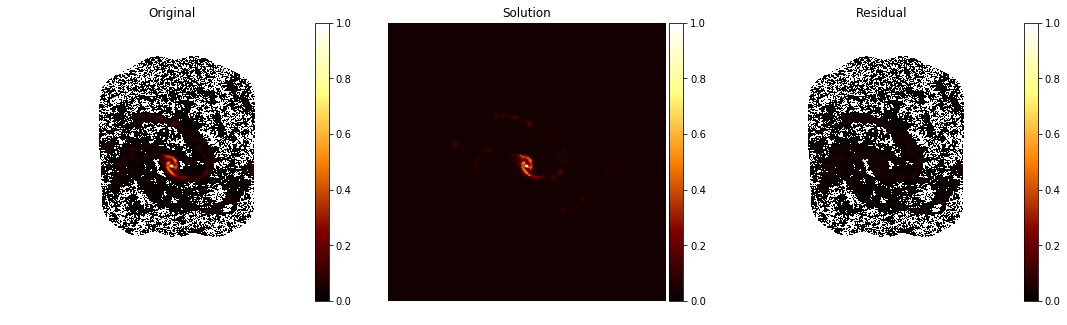

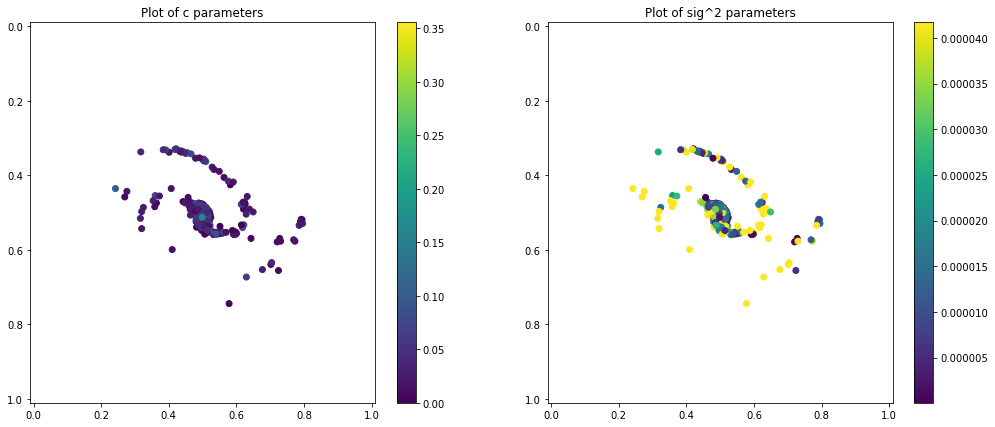

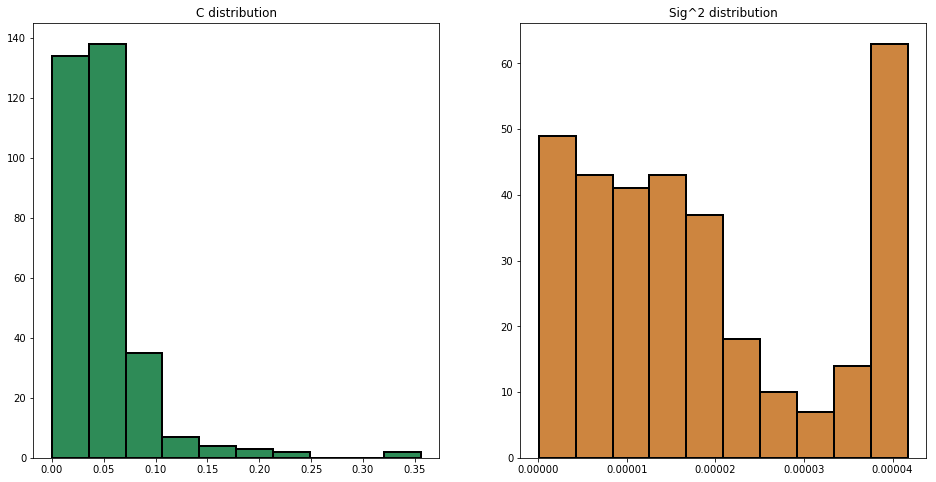

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140111

Residual stats:
Residual RMS: 0.016547533717214787
Residual Variance: 0.0002684455439595725
Flux Lost: 0.06082216522099143
Flux Addition: 0.038082610718071244
psi1(u-f): 1.5292723100088996
Exceeded Pixels: 5679
Sharpness: 6.97555182798406
psi2(grad u): 0.0243268542920317
Total elapsed time: 590.6111545562744 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26279180091150967
Mean min distance between collocation and center p

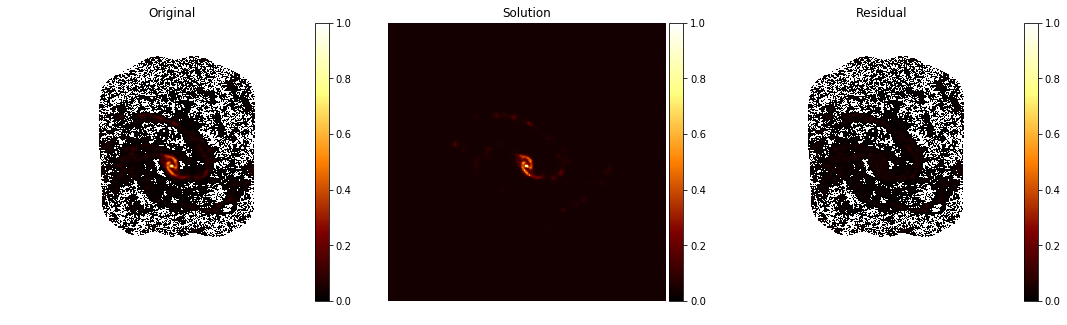

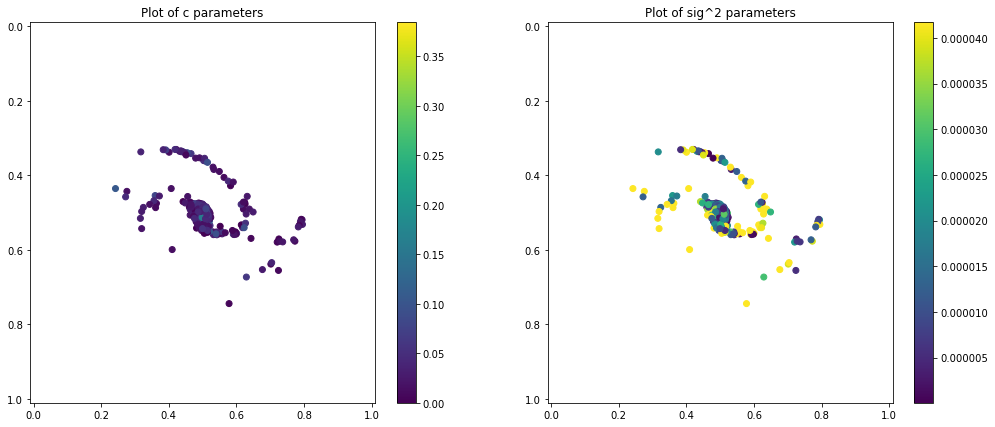

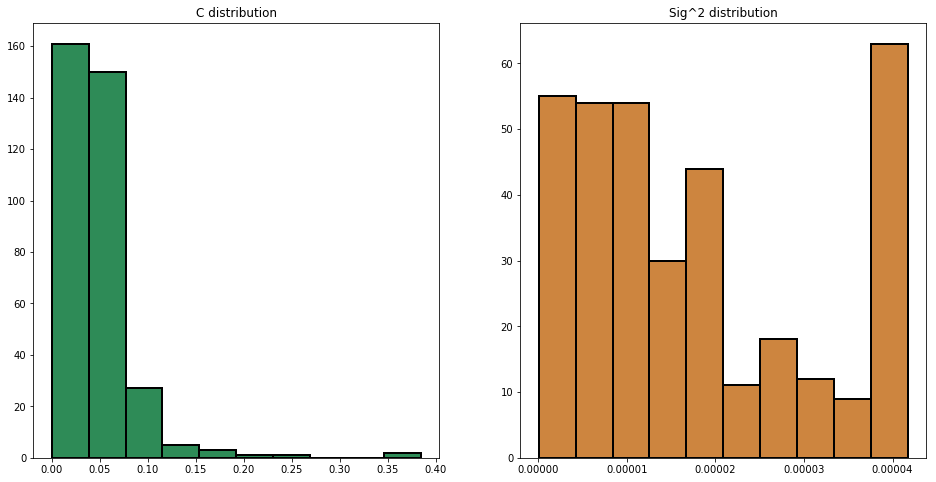

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150115

Residual stats:
Residual RMS: 0.015296053487426136
Residual Variance: 0.00023031584814132508
Flux Lost: 0.054397088675532564
Flux Addition: 0.03565023803211698
psi1(u-f): 1.5118071978131455
Exceeded Pixels: 5756
Sharpness: 7.1220585044925
psi2(grad u): 0.02314431305774679
Total elapsed time: 722.7223045825958 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2627918009141846
Mean min distance between collocation and center p

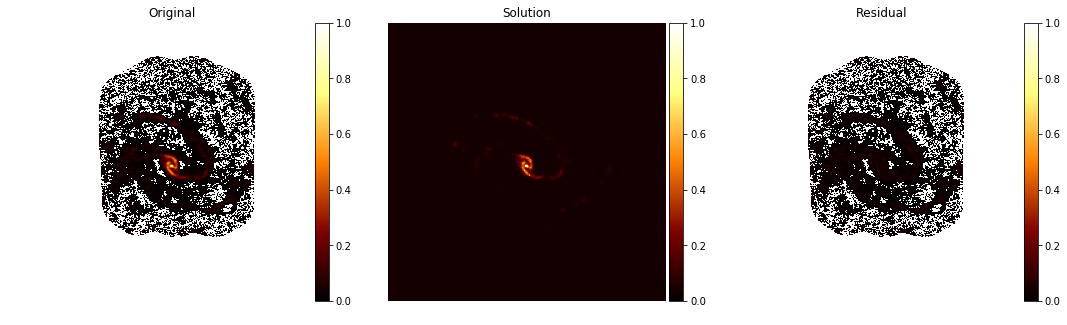

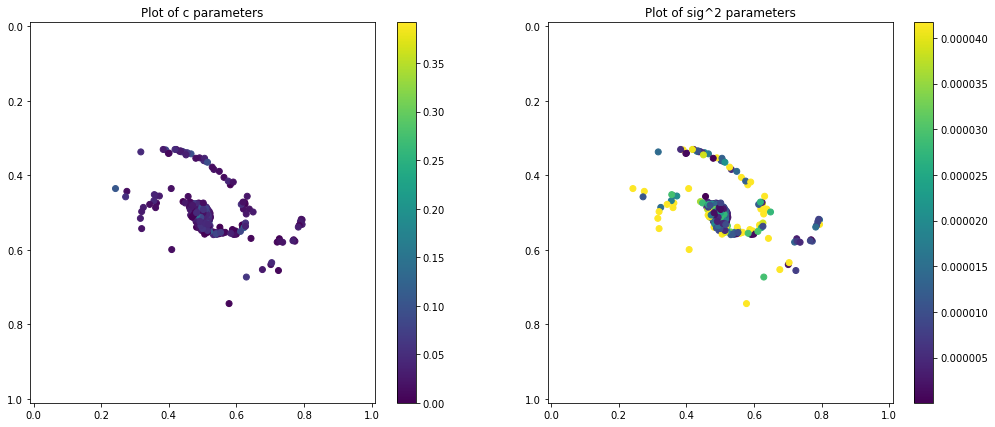

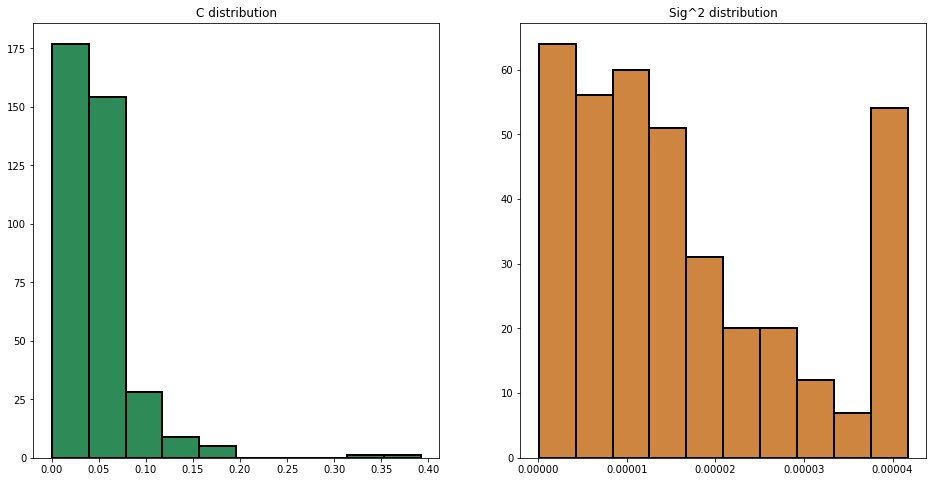

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160114

Residual stats:
Residual RMS: 0.014552354500049571
Residual Variance: 0.00020855678292224964
Flux Lost: 0.05266630143536486
Flux Addition: 0.03508226743427206
psi1(u-f): 1.0574365673825126
Exceeded Pixels: 5861
Sharpness: 6.819321723432437
psi2(grad u): 0.01640053806020431
Total elapsed time: 895.8570802211761 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2598353521725014
Mean min distance between collocation and center 

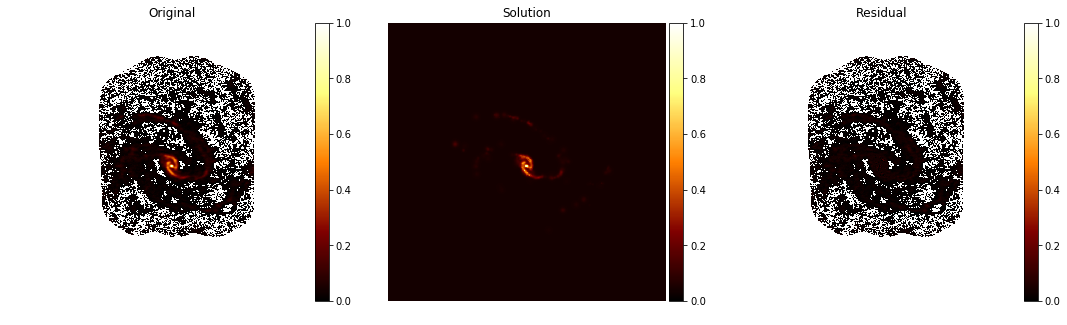

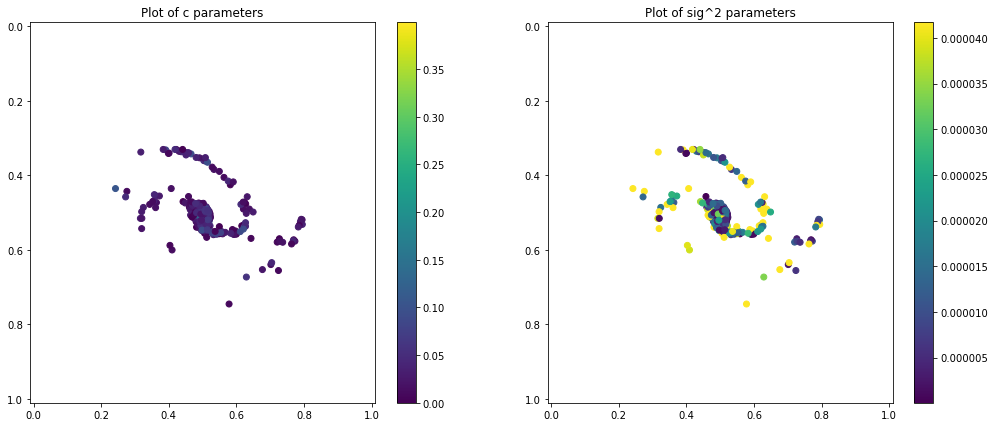

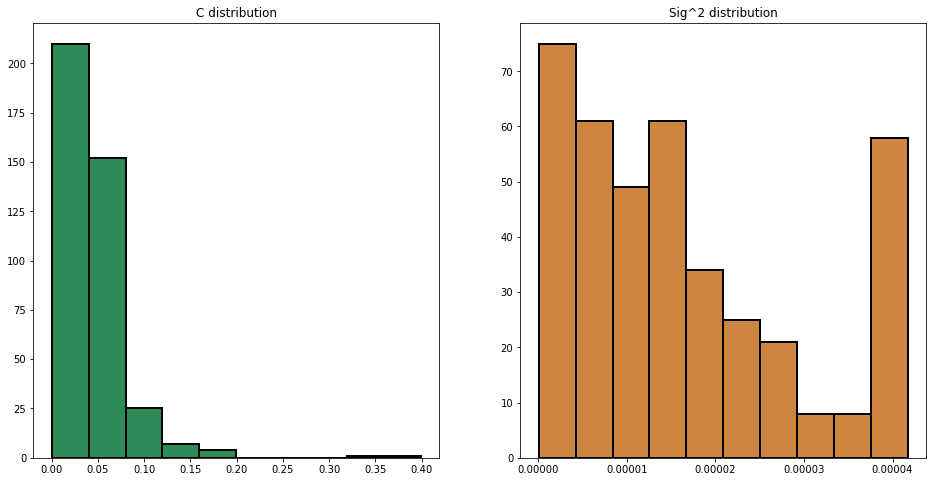

##########################################################################################
Processing 425 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 170100.
nfev: 170112

Residual stats:
Residual RMS: 0.0140532853695241
Residual Variance: 0.0001938415687961329
Flux Lost: 0.052032731490315114
Flux Addition: 0.03328624842805685
psi1(u-f): 0.9204212095873385
Exceeded Pixels: 5798
Sharpness: 6.809505673897066
psi2(grad u): 0.015184609770622888
Total elapsed time: 1034.655869960785 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26026607584315337
Mean min distance between collocation and center 

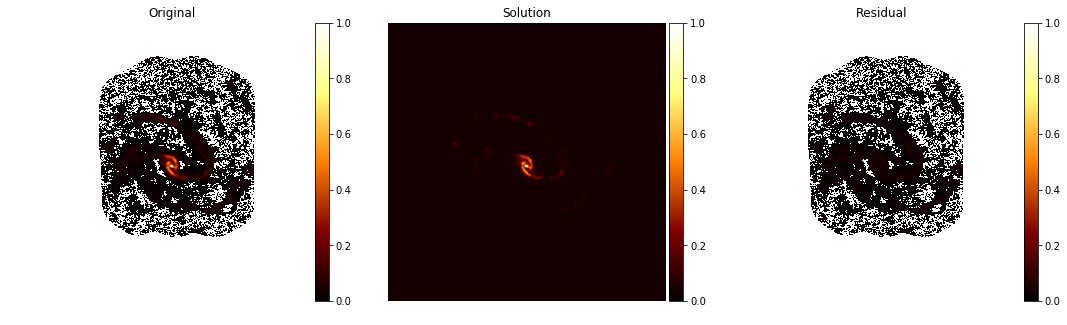

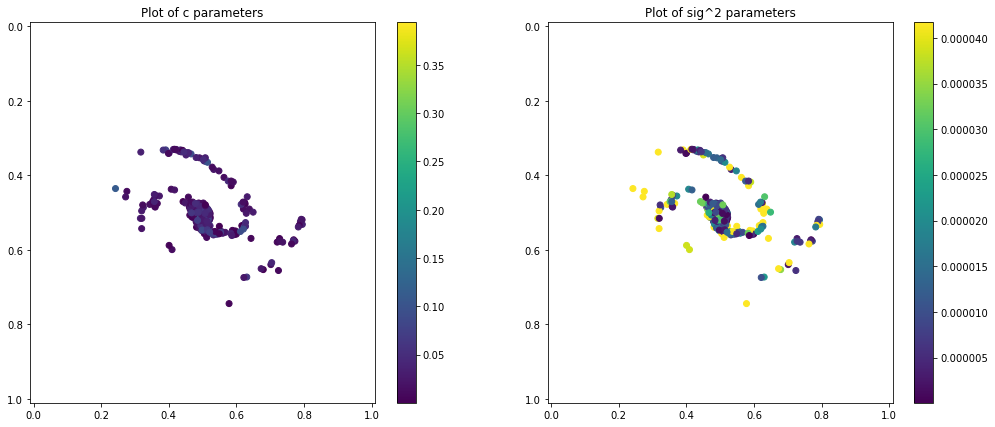

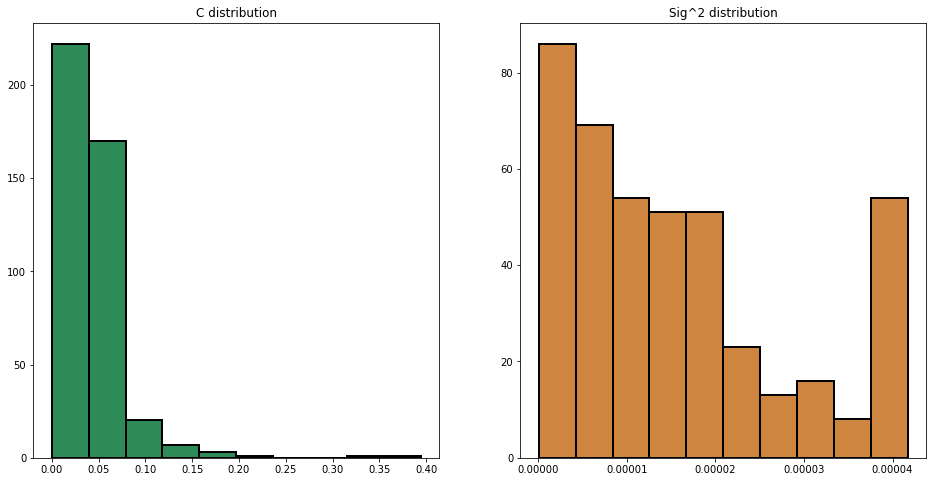

##########################################################################################
Processing 450 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 180100.
nfev: 180112

Residual stats:
Residual RMS: 0.013072936057235479
Residual Variance: 0.00016799624151503617
Flux Lost: 0.04866696668002799
Flux Addition: 0.031948994596867314
psi1(u-f): 0.6218269072688338
Exceeded Pixels: 5879
Sharpness: 6.688446081412192
psi2(grad u): 0.018873439871803187
Total elapsed time: 1261.7278683185577 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.26023701750765066
Mean min distance between collocation and cen

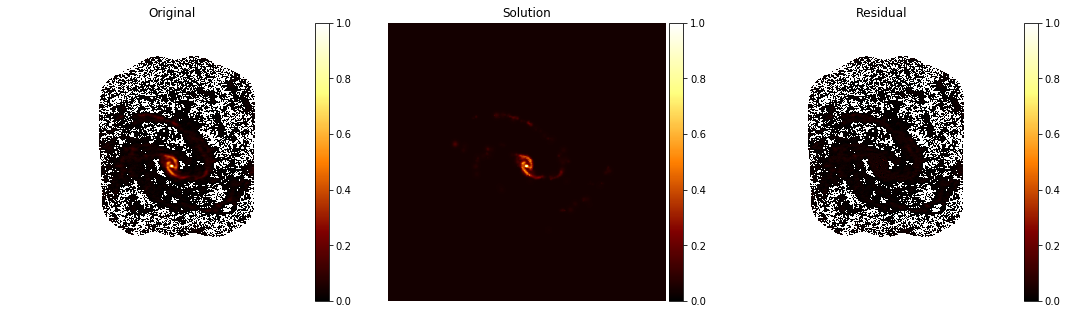

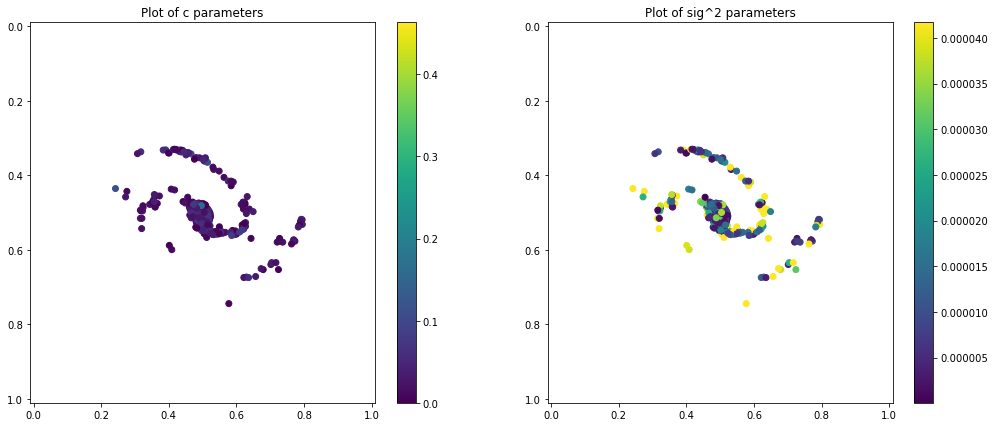

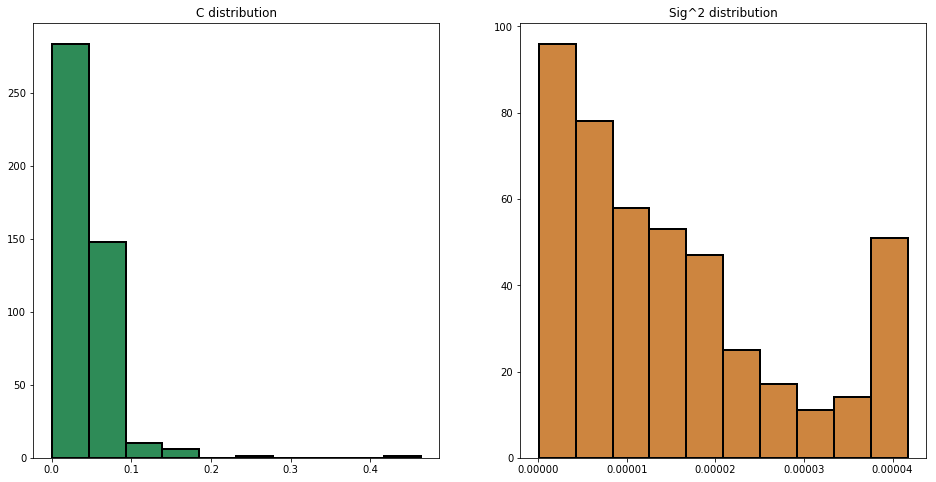

##########################################################################################
Processing 475 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 190100.
nfev: 190110

Residual stats:
Residual RMS: 0.015196913649757478
Residual Variance: 0.00022846688221899475
Flux Lost: 0.050604084020353136
Flux Addition: 0.03516063856231707
psi1(u-f): 1.9623892650075558
Exceeded Pixels: 5894
Sharpness: 7.312873083392637
psi2(grad u): 0.03279780181798204
Total elapsed time: 1427.6766822338104 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2614061128197861
Mean min distance between collocation and cente

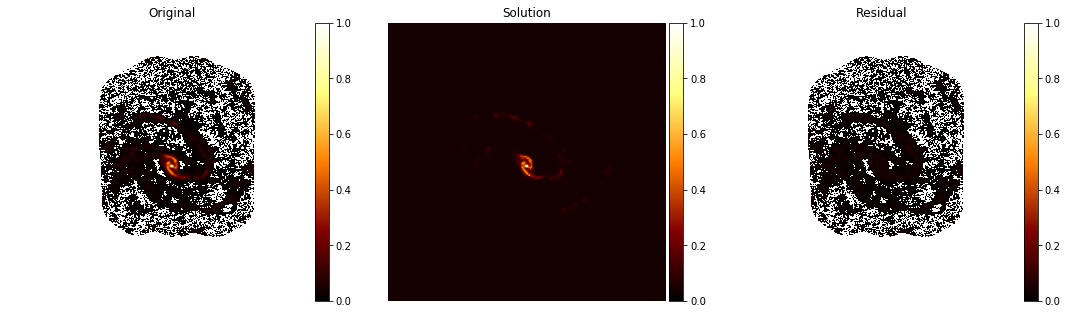

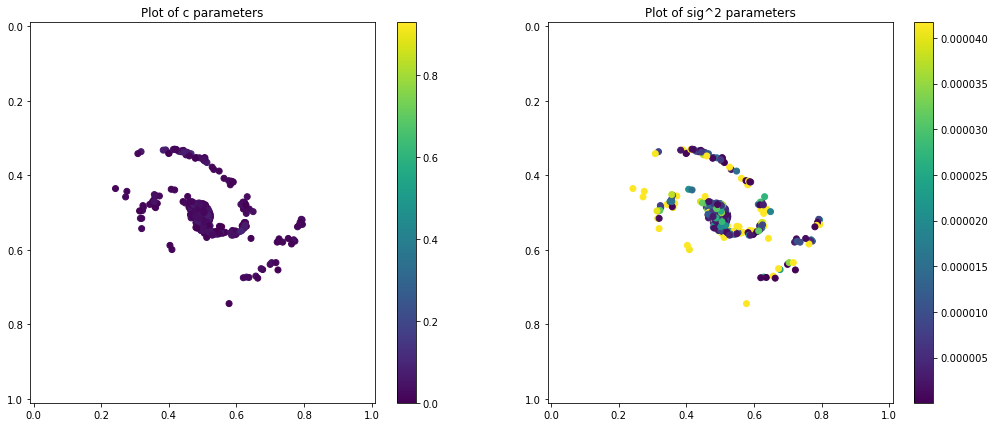

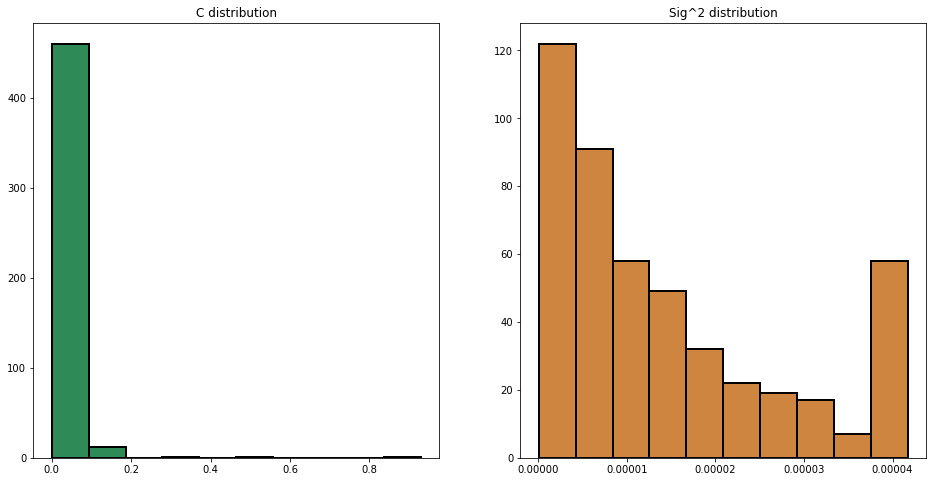

##########################################################################################
Processing 500 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 4
message: The cosine of the angle between func(x) and any column of the
  Jacobian is at most 0.000000 in absolute value
nfev: 2001

Residual stats:
Residual RMS: 0.08573717775537285
Residual Variance: 0.005821888595821017
Flux Lost: 0.4047846477214999
Flux Addition: 0.021272027013584178
psi1(u-f): 0.1404849508147235
Exceeded Pixels: 2905
Sharpness: 1.7104841541617077
psi2(grad u): 0.00015629555973649392
Total elapsed time: 18.485074520111084 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2602276575903

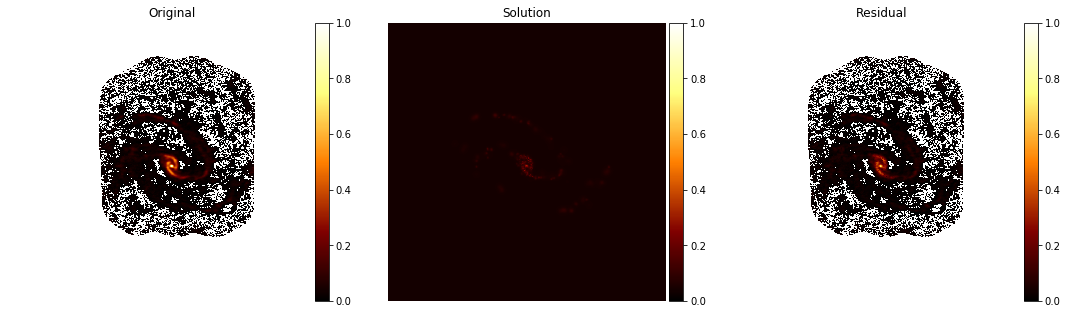

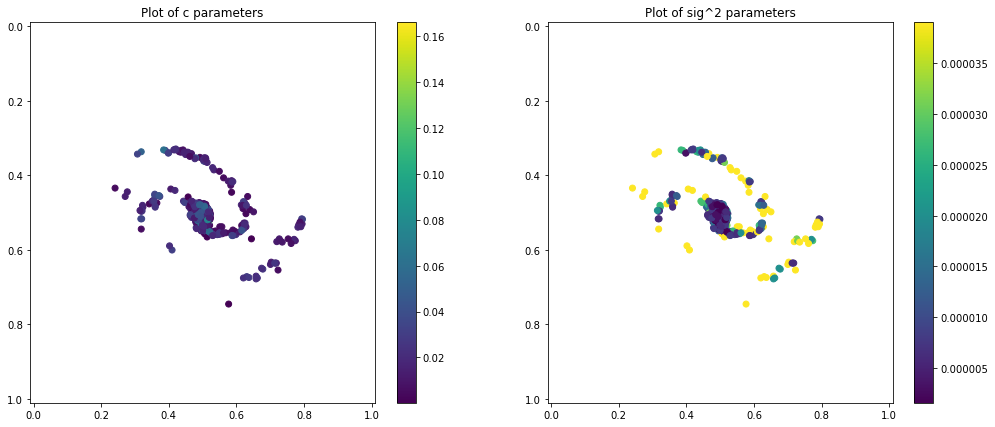

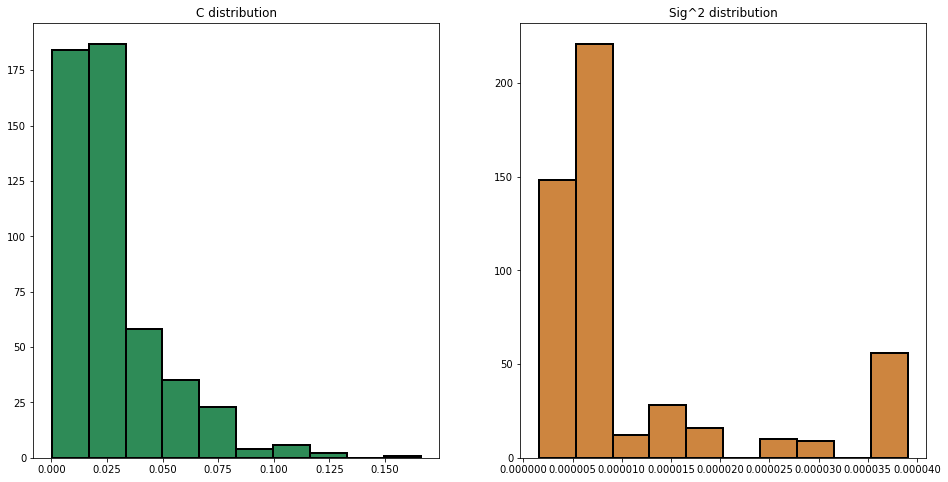

In [7]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    del elm.data; del elm.mask; del elm.dfunc
    
#pickling results
target = open("exp01_m100.pkl", "wb")
pickle.dump(elm_list, target)
target.close()

## Analysis of results in `M100`

In [3]:
elm_list = pickle.load( open('../results/elm_list_orion.pkl', 'rb') )

In [11]:
n_center = [len(elm.c) for elm in elm_list]
r_stats = [elm.get_residual_stats() for elm in elm_list]
variance = [var for (var,_,_,_) in r_stats]
entropy = [entr for (_,entr,_,_) in r_stats]
rms = [rms for (_,_,rms,_) in r_stats]
var_rms = np.array(variance)/np.array(rms)**2

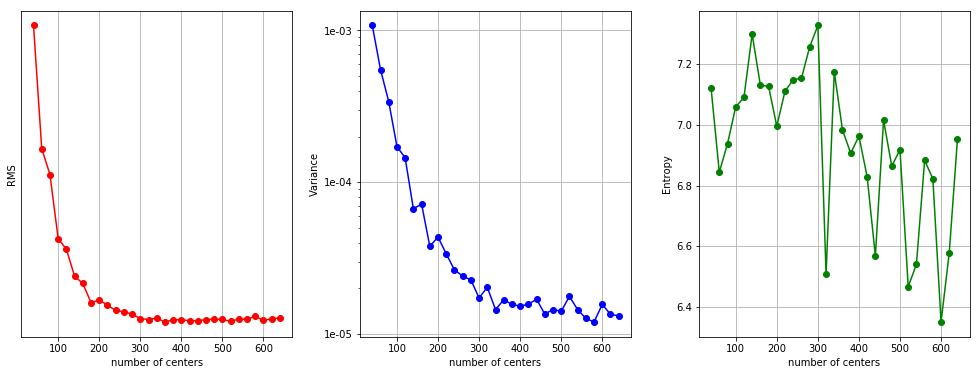

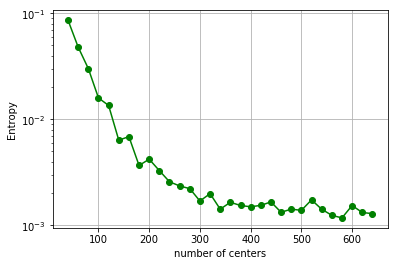

In [12]:
fig = plt.figure(figsize=(17,6))
fig.subplots_adjust(wspace=0.25)
plt.subplot(1,3,1)
plt.semilogy(n_center, rms, 'ro-')
#plt.title('RMS')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('RMS')

ax = plt.subplot(1,3,2)
plt.semilogy(n_center, variance, 'bo-')
#plt.title('Entropy')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Variance')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.subplot(1,3,3)
plt.plot(n_center, entropy, 'go-')
#plt.title('Entropy')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Entropy')

plt.show()


plt.semilogy(n_center, var_rms, 'go-')
#plt.title('Entropy')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Entropy')
plt.show()